In [136]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.cluster import KMeans


In [137]:
nut = pd.read_csv("nutrientcomposition_new.csv")  
nut.head()


,S.No,Protein,Fat,vitaminC,Fibre,Product
0,725,0.000128,0.131787,0.399502,0.616891,Unknown
1,816,0.000832,0.400516,1.420966,1.054027,"Mountain yam, hawaii, cooked, steamed, without..."
2,804,0.001940,0.096019,0.440585,0.041487,Unknown
3,776,0.002033,0.046392,0.988005,1.662208,"Milk, chocolate, fluid, commercial, reduced fa..."
4,242,0.002175,0.561462,1.447903,0.189549,"Crackers, cheese, sandwich-type with cheese fi..."


In [138]:
nut1 =nut.drop('S.No', axis=1)

In [139]:
nut1=nut1.drop('Product',axis=1)

In [140]:
nut1.head()

,Protein,Fat,vitaminC,Fibre
0,0.000128,0.131787,0.399502,0.616891
1,0.000832,0.400516,1.420966,1.054027
2,0.001940,0.096019,0.440585,0.041487
3,0.002033,0.046392,0.988005,1.662208
4,0.002175,0.561462,1.447903,0.189549


In [141]:
sc = StandardScaler()
X_std =  sc.fit_transform(nut1)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[1.00057307 0.38253077 0.02540316 0.04384809]
 [0.38253077 1.00057307 0.04829969 0.06811834]
 [0.02540316 0.04829969 1.00057307 0.36167341]
 [0.04384809 0.06811834 0.36167341 1.00057307]]


In [142]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.5136229  -0.49012979 -0.70287794 -0.04389671]
 [-0.53984503 -0.45263957  0.70967078  0.00722082]
 [-0.45922822  0.54059078  0.00263582 -0.70488588]
 [-0.48359933  0.51249568 -0.04819792  0.70792431]]

 Eigen Values 
%s [1.46663112 1.2799764  0.61725689 0.63842786]


In [143]:
print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Values:


,0,1,2,3
0,1.466631,1.279976,0.617257,0.638428


In [144]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 36.64477812  68.6258608   84.57741591 100.        ]


In [145]:
nut2= PCA(n_components=2).fit_transform(nut1)
a=PCA(n_components=2).fit(nut1)
b=a.components_.T




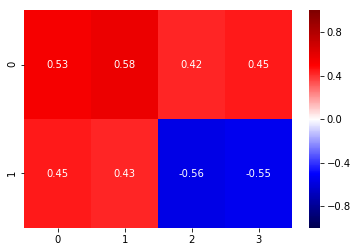

In [146]:
sns.heatmap(a.components_, cmap='seismic', annot=True, vmax=1, vmin=-1)

In [147]:
# In dimension 1 the weightage of 
nut2=pd.DataFrame(nut2,columns=('D1','D2'))
nut2.head()

,D1,D2
0,-1.274968,-0.304669
1,-0.490843,-1.004906
2,-1.537824,-0.028041
3,-0.601247,-1.242878
4,-0.777674,-0.478989


In [148]:
cluster_range = range( 2, 6)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(nut2)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,1233.997892
1,3,781.415507
2,4,633.030253
3,5,517.365801


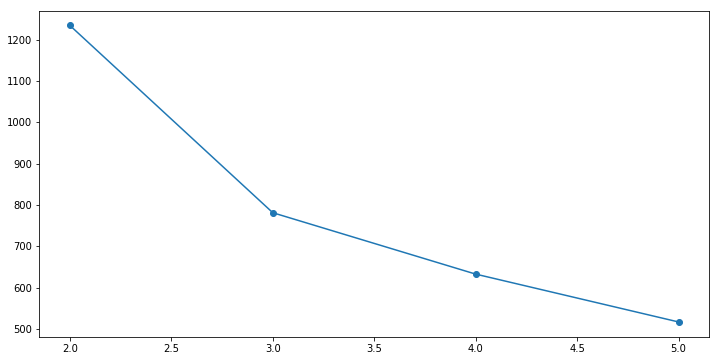

In [149]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [150]:
cluster = KMeans( n_clusters = 3, random_state = 2354 )#set seed to compare results
cluster.fit(nut2)
#mpg_df_attr_z_copy = mpg_df_attr_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2354, tol=0.0001, verbose=0)

In [151]:
prediction=cluster.predict(nut2)
nut2["GROUP"] = prediction   
# Creating a new column "GROUP" which will hold the cluster id of each record


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000007544247898>,
      dtype=object)

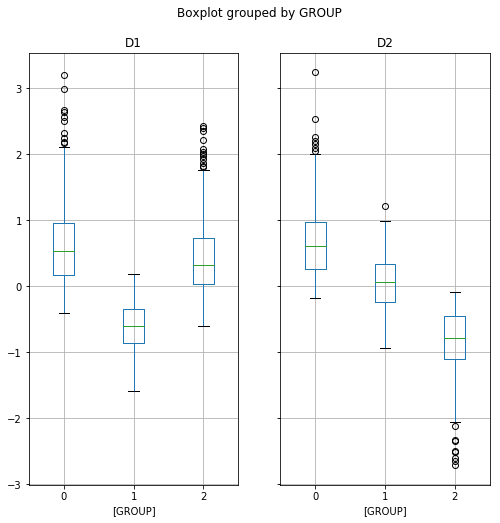

In [158]:

nut2.boxplot(by='GROUP' ,layout=(1,2),figsize=(8,8))
#sns.boxplot(data=nut2)